In [203]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import csv
import os
from os import listdir

In [204]:
path = 'C:/Users/steve/Desktop/Thesis/ADP files/09.03.16'
file_group = 'SWC1609011431'
site_location = 'C.B1S10'
os.chdir(path)
beam1 ='%s.a1'% file_group
beam2 ='%s.a2'% file_group
beam3 ='%s.a3'% file_group
VE_file = '%s.ve'% file_group
VN_file = '%s.vn'% file_group
VU_file = '%s.vu'% file_group
save_name=(VU_file[:-3]) # save file name string
save_file_name = (path[-8:])
#signal amplitude
beam1= pd.read_csv(beam1, delimiter='\s+', header=None)
beam1 = np.array(np.std(beam1,axis = 0)[1:])
beam2= pd.read_csv(beam2, delimiter='\s+', header=None)
beam2 = np.array(np.std(beam2,axis = 0)[1:])
beam3= pd.read_csv(beam3, delimiter='\s+', header=None)
beam3 = np.array(np.std(beam3,axis = 0)[1:])
#velocities
VE = pd.read_csv(VE_file, delimiter='\s+', header=None)
VN = pd.read_csv(VN_file, delimiter='\s+', header=None)
VU = pd.read_csv(VU_file, delimiter='\s+', header=None)
# average velocities 
meanVE = np.array(np.mean(VE, axis = 0)[1:]) # average profiles across a depth bin
meanVN = np.array(np.mean(VN, axis = 0)[1:])
meanVU = np.array(np.mean(VU, axis = 0)[1:])
# standard deveation of velocities
VE_SD = np.array(np.std(VE,axis = 0)[1:])
VN_SD= np.array(np.std(VN,axis = 0)[1:])
VU_SD = np.array(np.std(VU,axis = 0)[1:])
# max and min velocities
max_VE = np.array(np.max(VE,axis = 0)[1:])
max_VN = np.array(np.max(VN,axis = 0)[1:])
max_VU = np.array(np.max(VU,axis = 0)[1:])
min_VE =np.array(np.min(VE,axis = 0)[1:])
min_VN =np.array(np.min(VN,axis = 0)[1:])
min_VU =np.array(np.min(VU,axis = 0)[1:])
# combine two vectors into 1 using a^2 + b^2 = c^2. Solve for C
VNE = np.array((VE_SD**2 + VN_SD**2)**.5)



In [205]:
all_data=pd.DataFrame()
all_data['Depth (m)'] = np.arange(.7,15.4, .7)
all_data['VNE (cm/s)'] = VNE
all_data['meanVE (cm/s)'] = meanVE
all_data['meanVN (cm/s)'] = meanVN
all_data['meanVU (cm/s)'] = meanVU
all_data['StD_VE (cm/s)'] = VE_SD
all_data['StD_VN (cm/s)'] = VN_SD
all_data['StD_VU (cm/s)'] = VU_SD
all_data['maxVE (cm/s)'] = max_VE
all_data['maxVN (cm/s)'] = max_VN
all_data['maxVU (cm/s)'] = max_VU
all_data['minVE (cm/s)'] = min_VE
all_data['minVN (cm/s)'] = min_VN
all_data['minVU (cm/s)'] = min_VU



all_data.to_csv(save_file_name+'.'+site_location+'.csv')
#save as csv directory name wich is date MM.DD.YY.Block(number)Site(number) 

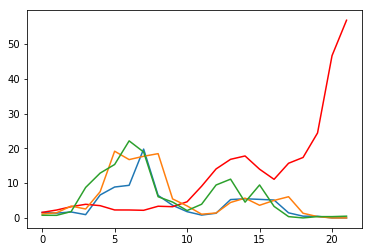

In [206]:
plt.figure()
plt.plot(beam1)
plt.plot(VNE, 'r-')
plt.plot(beam2)
plt.plot(beam3)
plt.show()